<a href="https://colab.research.google.com/github/AFBA1993/Yandex/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Candidate: Andrés Felipe Bolaños Acosta.

Position: code reviewer.

E-mail: afb.acosta@gmail.com.

Mobile phone: +5511973662765.

Portfolio: https://github.com/AFBA1993/.

Linkedin: https://www.linkedin.com/in/andr%C3%A9s-felipe-bola%C3%B1os-acosta-b14b691a4/.

Google Scholar: https://scholar.google.com.br/citations?user=GLKkmsoAAAAJ&hl=pt-BR.

### ***Task 2. Problem-solving***

In [1]:
import pandas as pd
import math
import numpy as np
import datetime
from re import split
import seaborn as sns
import matplotlib.pyplot as plt

1. Download the event_data.csv dataset, which contains data on the use of the mobile application of users who registered from July 29 to September 1, 2019.

*Answer:*


In [2]:
data = pd.read_csv("/content/drive/MyDrive/YandexTest/event_data.csv",
                                                   encoding = 'cp1252')

In [3]:
data.head()

,user_id,event_date,event_type,purchase_amount
0,c40e6a,2019-07-29 00:02:15,registration,NaN
1,a2b682,2019-07-29 00:04:46,registration,NaN
2,9ac888,2019-07-29 00:13:22,registration,NaN
3,93ff22,2019-07-29 00:16:47,registration,NaN
4,65ef85,2019-07-29 00:19:23,registration,NaN


2. Highlight user cohorts based on the week of registration in the application. The cohort
identifier should be the week ordinal (for example, the week from July 29 to August 4
should have identifier 31).

*Answer:*

In [4]:
def split_date_hour(event_date):
  split_value = event_date.split()
  date = split_value[0]
  return date

In [5]:
data["date"] = data.event_date.apply(lambda x: split_date_hour(x))
data.head()

,user_id,event_date,event_type,purchase_amount,date
0,c40e6a,2019-07-29 00:02:15,registration,NaN,2019-07-29
1,a2b682,2019-07-29 00:04:46,registration,NaN,2019-07-29
2,9ac888,2019-07-29 00:13:22,registration,NaN,2019-07-29
3,93ff22,2019-07-29 00:16:47,registration,NaN,2019-07-29
4,65ef85,2019-07-29 00:19:23,registration,NaN,2019-07-29


In [6]:
data.set_index('user_id', inplace = True)
data["cohort_date"] = data.groupby(level = 0)['date'].min()
data.tail()

,event_date,event_type,purchase_amount,date,cohort_date
user_id,,,,,
930c23,2019-09-01 23:57:41,simple_event,NaN,2019-09-01,2019-08-07
a84999,2019-09-01 23:57:50,simple_event,NaN,2019-09-01,2019-08-14
175e4d,2019-09-01 23:59:40,simple_event,NaN,2019-09-01,2019-08-10
1c2210,2019-09-01 23:59:51,simple_event,NaN,2019-09-01,2019-08-17
d799dc,2019-09-01 23:59:54,simple_event,NaN,2019-09-01,2019-08-29


In [7]:
def week_year(date):
  date = date.split('-')
  week = datetime.date(int(date[0]), int(date[1]), int(date[2])).strftime("%V")
  return int(week)

In [8]:
data['cohort_id'] = data.cohort_date.apply(lambda x: week_year(x))
data.tail()

,event_date,event_type,purchase_amount,date,cohort_date,cohort_id
user_id,,,,,,
930c23,2019-09-01 23:57:41,simple_event,NaN,2019-09-01,2019-08-07,32
a84999,2019-09-01 23:57:50,simple_event,NaN,2019-09-01,2019-08-14,33
175e4d,2019-09-01 23:59:40,simple_event,NaN,2019-09-01,2019-08-10,32
1c2210,2019-09-01 23:59:51,simple_event,NaN,2019-09-01,2019-08-17,33
d799dc,2019-09-01 23:59:54,simple_event,NaN,2019-09-01,2019-08-29,35


3. How many unique users in the cohort with ID 33?

*Answer:*

In [9]:
users_coh_33 = data[data['cohort_id']== 33]
users_coh_33.reset_index(inplace = True)

In [10]:
users_coh_33

,user_id,event_date,event_type,purchase_amount,date,cohort_date,cohort_id
0,e8d789,2019-08-12 00:06:02,registration,NaN,2019-08-12,2019-08-12,33
1,e6dc6e,2019-08-12 00:26:03,registration,NaN,2019-08-12,2019-08-12,33
2,f5a2de,2019-08-12 00:26:17,registration,NaN,2019-08-12,2019-08-12,33
3,139d62,2019-08-12 00:37:48,registration,NaN,2019-08-12,2019-08-12,33
4,1ff31a,2019-08-12 00:40:56,registration,NaN,2019-08-12,2019-08-12,33
...,...,...,...,...,...,...,...
18962,622e69,2019-09-01 23:53:06,simple_event,NaN,2019-09-01,2019-08-17,33
18963,9389d9,2019-09-01 23:53:16,simple_event,NaN,2019-09-01,2019-08-18,33
18964,8aa32e,2019-09-01 23:53:53,simple_event,NaN,2019-09-01,2019-08-15,33
18965,a84999,2019-09-01 23:57:50,simple_event,NaN,2019-09-01,2019-08-14,33


In [11]:
unique33_users = users_coh_33['user_id'].unique()
unique33_users.shape

(2045,)

There are 2045 unique users within the cohort 33

4. For each event, highlight the indicator lifetime - the weekly lifetime of the cohort. The
lifetime indicator is calculated based on the serial number of the week in which the event
is committed, relative to the week of registration. For example, an event committed on
August 3 by a user from a cohort of registrants at 31 weeks will be committed on the zero
week of lifetime, and an event committed by the same user on August 5 will be committed
on the first week of lifetime).

*Answer:*

In [12]:
data['event_week'] = data.date.apply(lambda x: week_year(x))
data['lifetime_indicator'] = -(data.cohort_id - data.event_week)
data

,event_date,event_type,purchase_amount,date,cohort_date,cohort_id,event_week,lifetime_indicator
user_id,,,,,,,,
c40e6a,2019-07-29 00:02:15,registration,NaN,2019-07-29,2019-07-29,31,31,0
a2b682,2019-07-29 00:04:46,registration,NaN,2019-07-29,2019-07-29,31,31,0
9ac888,2019-07-29 00:13:22,registration,NaN,2019-07-29,2019-07-29,31,31,0
93ff22,2019-07-29 00:16:47,registration,NaN,2019-07-29,2019-07-29,31,31,0
65ef85,2019-07-29 00:19:23,registration,NaN,2019-07-29,2019-07-29,31,31,0
...,...,...,...,...,...,...,...,...
930c23,2019-09-01 23:57:41,simple_event,NaN,2019-09-01,2019-08-07,32,35,3
a84999,2019-09-01 23:57:50,simple_event,NaN,2019-09-01,2019-08-14,33,35,2
175e4d,2019-09-01 23:59:40,simple_event,NaN,2019-09-01,2019-08-10,32,35,3


5. Build a summary table of changes in the Retention Rate for cohorts depending on lifetime.

*Answer:*

In [13]:
data.reset_index(inplace = True)
grouped = data.groupby(['cohort_id', 'lifetime_indicator'])

In [14]:
cohorts = grouped.agg({'user_id': pd.Series.nunique,
                       'event_type': pd.Series.nunique,
                       'purchase_amount': np.sum })

In [15]:
cohorts

user_id  event_type  purchase_amount
cohort_id lifetime_indicator                                      
31        0                      1975           3           8890.0
          1                      1832           2          20540.0
          2                      1243           2          12210.0
          3                       705           2           6120.0
          4                       297           2           2010.0
32        0                      1952           3          10850.0
          1                      1814           2          21050.0
          2                      1265           2          12600.0
          3                       705           2           6260.0
33        0                      2045           3           9790.0
          1                      1890           2          21730.0
          2                      1352           2          13740.0
34        0                      1974           3           9510.0
          1                      1834           2          19640.0
35        0                      2050           3          11490.0

In [16]:
retention = cohorts['user_id'].unstack(0).T
retention.head()

lifetime_indicator,0,1,2,3,4
cohort_id,,,,,
31,1975.0,1832.0,1243.0,705.0,297.0
32,1952.0,1814.0,1265.0,705.0,NaN
33,2045.0,1890.0,1352.0,NaN,NaN
34,1974.0,1834.0,NaN,NaN,NaN
35,2050.0,NaN,NaN,NaN,NaN


In [17]:
cohort_group_size = cohorts['user_id'].groupby(level = 0).first()
cohort_group_size

cohort_id
31    1975
32    1952
33    2045
34    1974
35    2050
Name: user_id, dtype: int64

In [18]:
retention_percentage = cohorts['user_id'].unstack(0).divide(
                                  cohort_group_size, axis = 1).T
retention_percentage

lifetime_indicator,0,1,2,3,4
cohort_id,,,,,
31,1.0,0.927595,0.629367,0.356962,0.15038
32,1.0,0.929303,0.648053,0.361168,NaN
33,1.0,0.924205,0.661125,NaN,NaN
34,1.0,0.929078,NaN,NaN,NaN
35,1.0,NaN,NaN,NaN,NaN


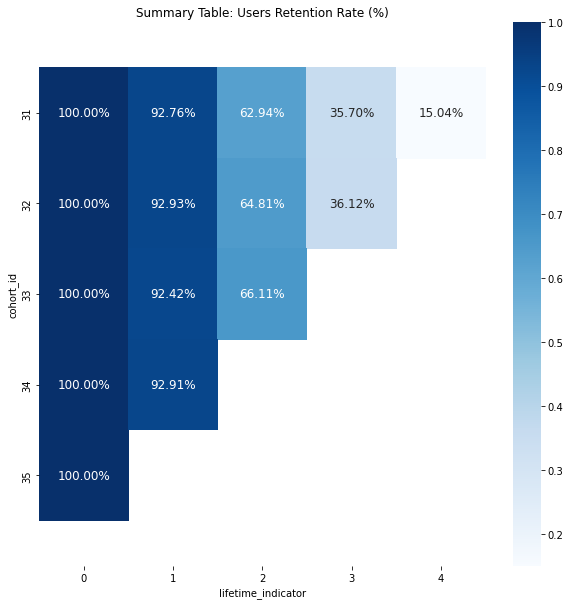

In [19]:
data_retention_percent = retention_percentage

plt.figure(figsize = (10, 10))
plt.title('Summary Table: Users Retention Rate (%)')
sns.heatmap(data = data_retention_percent,
            annot = True,
            fmt = ".2%",
            annot_kws = {'size': 12},
            cbar = True,
            cmap = 'Blues')
b, t = plt.ylim()
b+= 0.5
t-= 0.5
plt.ylim(b, t)
plt.show()

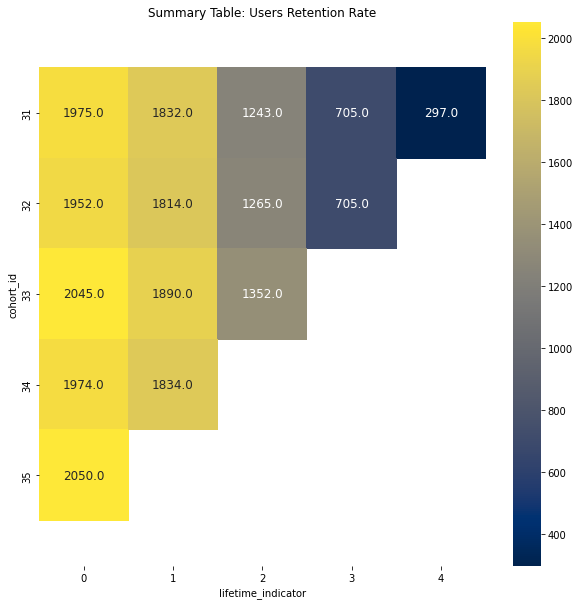

In [20]:
data_retention_raw = retention

plt.figure(figsize = (10, 10))
plt.title('Summary Table: Users Retention Rate')
sns.heatmap(data = data_retention_raw,
            annot = True,
            fmt = "",
            annot_kws = {'size': 12},
            cbar = True,
            cmap = 'cividis')
b, t = plt.ylim()
b+= 0.5
t-= 0.5
plt.ylim(b, t)
plt.show()

6. What is the 3 week retention rate for a cohort with ID 32? Give the answer in percent,
rounded to 2 decimal places, inclusive.

*Answer:*

In [21]:
retention_percentage

lifetime_indicator,0,1,2,3,4
cohort_id,,,,,
31,1.0,0.927595,0.629367,0.356962,0.15038
32,1.0,0.929303,0.648053,0.361168,NaN
33,1.0,0.924205,0.661125,NaN,NaN
34,1.0,0.929078,NaN,NaN,NaN
35,1.0,NaN,NaN,NaN,NaN


In [22]:
round(retention_percentage[3][32]*100,2)

36.12

The retention rate for a cohort with ID in the 3 week of lifetime is 36.12%.

7. Build a summary table of changes in the indicator ARPPU (Average Revenue Per Paying
User) for cohorts depending on lifetime.

*Answer:*

In [23]:
retention_purchases = cohorts['purchase_amount'].unstack(0).T
retention_purchases

lifetime_indicator,0,1,2,3,4
cohort_id,,,,,
31,8890.0,20540.0,12210.0,6120.0,2010.0
32,10850.0,21050.0,12600.0,6260.0,NaN
33,9790.0,21730.0,13740.0,NaN,NaN
34,9510.0,19640.0,NaN,NaN,NaN
35,11490.0,NaN,NaN,NaN,NaN


In [24]:
retention_users = retention
ARPPU_data = retention_purchases/retention_users
ARPPU_data

lifetime_indicator,0,1,2,3,4
cohort_id,,,,,
31,4.501266,11.211790,9.823009,8.680851,6.767677
32,5.558402,11.604190,9.960474,8.879433,NaN
33,4.787286,11.497354,10.162722,NaN,NaN
34,4.817629,10.708833,NaN,NaN,NaN
35,5.604878,NaN,NaN,NaN,NaN


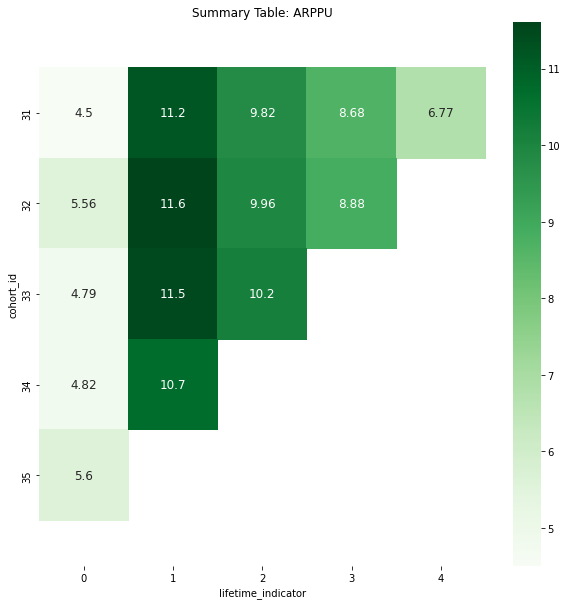

In [25]:
plt.figure(figsize = (10, 10))
plt.title('Summary Table: ARPPU')
sns.heatmap(data = ARPPU_data,
            annot = True,
            fmt = ".3g",
            annot_kws = {'size': 12},
            cbar = True,
            cmap = 'Greens')
b, t = plt.ylim()
b+= 0.5
t-= 0.5
plt.ylim(b, t)
plt.show()

8. What is the 3-week ARPPU of a cohort with ID 31? Give the answer with a floating point
number, rounded to 2 decimal places, inclusive.

*Answer: *

In [26]:
round(ARPPU_data[3][31],2)

8.68

The ARPPU corresponds to 8.68 US Dollars for cohort with ID 31 in the 3-week of lifetime.

9. What is the median time between user registration and first purchase? Give the answer
in seconds (!) As an integer.

In [27]:
from datetime import datetime

In [28]:
raw_data = data
raw_data

,user_id,event_date,event_type,purchase_amount,date,cohort_date,cohort_id,event_week,lifetime_indicator
0,c40e6a,2019-07-29 00:02:15,registration,NaN,2019-07-29,2019-07-29,31,31,0
1,a2b682,2019-07-29 00:04:46,registration,NaN,2019-07-29,2019-07-29,31,31,0
2,9ac888,2019-07-29 00:13:22,registration,NaN,2019-07-29,2019-07-29,31,31,0
3,93ff22,2019-07-29 00:16:47,registration,NaN,2019-07-29,2019-07-29,31,31,0
4,65ef85,2019-07-29 00:19:23,registration,NaN,2019-07-29,2019-07-29,31,31,0
...,...,...,...,...,...,...,...,...,...
79737,930c23,2019-09-01 23:57:41,simple_event,NaN,2019-09-01,2019-08-07,32,35,3
79738,a84999,2019-09-01 23:57:50,simple_event,NaN,2019-09-01,2019-08-14,33,35,2
79739,175e4d,2019-09-01 23:59:40,simple_event,NaN,2019-09-01,2019-08-10,32,35,3
79740,1c2210,2019-09-01 23:59:51,simple_event,NaN,2019-09-01,2019-08-17,33,35,2


In [29]:
raw_data.drop(columns = ['lifetime_indicator', 'event_week', 'cohort_id', 
                         'cohort_date', 'date'], inplace = True)
raw_data

,user_id,event_date,event_type,purchase_amount
0,c40e6a,2019-07-29 00:02:15,registration,NaN
1,a2b682,2019-07-29 00:04:46,registration,NaN
2,9ac888,2019-07-29 00:13:22,registration,NaN
3,93ff22,2019-07-29 00:16:47,registration,NaN
4,65ef85,2019-07-29 00:19:23,registration,NaN
...,...,...,...,...
79737,930c23,2019-09-01 23:57:41,simple_event,NaN
79738,a84999,2019-09-01 23:57:50,simple_event,NaN
79739,175e4d,2019-09-01 23:59:40,simple_event,NaN
79740,1c2210,2019-09-01 23:59:51,simple_event,NaN


Creating a cohort_date_time column that corresponds to the date of the user's registration:

In [30]:
raw_data.set_index('user_id', inplace = True)
raw_data["cohort_date_time"] = data.groupby(level = 0)['event_date'].min()
raw_data.reset_index(inplace = True)

In [31]:
raw_data.reset_index(inplace = True)

Eliminating rows in 'the event_type' column that corresponds to 'registration' and 'simple_event':

In [32]:
raw_data.drop(raw_data[raw_data.event_type == 'simple_event'].index, 
                                                         inplace=True)


In [33]:
raw_data.drop(raw_data[raw_data.event_type == 'registration'].index, 
                                                         inplace=True)

Building a column with the user's first puchase:

In [34]:
raw_data.set_index('user_id', inplace = True)
raw_data["first_purchase"] = data.groupby(level = 0)['event_date'].min()
raw_data.reset_index(inplace = True)

Dropping users' events that do not belong to the first purchase:

In [35]:
raw_data.drop(raw_data[raw_data.event_date !=\
                                   raw_data.first_purchase].index, 
                                                      inplace=True)

Formating properly timedate columns and calculating the difference in seconds between resgistration and first purchase for each user:

In [36]:
raw_data['first_purchase'] = raw_data.first_purchase.apply(lambda x : 
                              datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

raw_data['registration'] = raw_data.cohort_date_time.apply(lambda x : 
                              datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
                              

In [37]:
raw_data['seconds_from_registration'] = (raw_data['first_purchase']
                                     -raw_data['registration'])
raw_data['seconds_from_registration'] =\
               raw_data['seconds_from_registration'].apply(lambda x : 
                                                           x.total_seconds())

In [38]:
raw_data

,user_id,index,event_date,event_type,purchase_amount,cohort_date_time,first_purchase,registration,seconds_from_registration
0,51dc02,146,2019-07-29 11:43:11,purchase,10.0,2019-07-29 07:16:36,2019-07-29 11:43:11,2019-07-29 07:16:36,15995.0
1,f1c95f,147,2019-07-29 11:48:46,purchase,50.0,2019-07-29 02:35:11,2019-07-29 11:48:46,2019-07-29 02:35:11,33215.0
2,a13a2b,188,2019-07-29 14:50:07,purchase,10.0,2019-07-29 12:32:03,2019-07-29 14:50:07,2019-07-29 12:32:03,8284.0
3,deccc0,341,2019-07-29 23:38:20,purchase,50.0,2019-07-29 13:25:00,2019-07-29 23:38:20,2019-07-29 13:25:00,36800.0
4,11e04e,395,2019-07-30 03:08:15,purchase,50.0,2019-07-29 21:56:29,2019-07-30 03:08:15,2019-07-29 21:56:29,18706.0
...,...,...,...,...,...,...,...,...,...
6199,176a43,79655,2019-09-01 23:16:13,purchase,10.0,2019-08-29 13:06:00,2019-09-01 23:16:13,2019-08-29 13:06:00,295813.0
6200,de72ff,79662,2019-09-01 23:18:43,purchase,20.0,2019-08-29 13:15:03,2019-09-01 23:18:43,2019-08-29 13:15:03,295420.0
6202,7f27ee,79691,2019-09-01 23:31:37,purchase,10.0,2019-08-11 14:44:59,2019-09-01 23:31:37,2019-08-11 14:44:59,1845998.0
6205,0a5860,79731,2019-09-01 23:54:50,purchase,30.0,2019-08-28 01:13:29,2019-09-01 23:54:50,2019-08-28 01:13:29,427281.0


In [39]:
int (raw_data.seconds_from_registration.median())

434774

The median time between user's registration and the first purchase is 434774 seconds.